# Метанпромбанк — Анализ оттока клиентов#

# Описание задачи #
    Заказчик: отдел маркетинга.
    Потребитель: менеджер маркетинговых компаний, менеджерам продуктов.
    Требуется: Выделить сегменты оточных клиентов, чтобы они были однородными, высокоотточными и покрвали максимум проблемных зон банка. Таким образом, маркетинговое воздействие на эти сегменты должно привести к уменьшению.
    Причина обращения: В банке драматически повысился отток клиентов, что угрожает существованию банка.
    Предыстория: Ранее подобные исследования проводились, но результаты устарели, необходимо новое исследование.

# Декомпозиция #

    1. Импорт, подготовка данных.
    1.1. Приведение имен столбцов к стандарту
    1.2. Проверка очевидных и скрытых дубликатов. Корректировка.
    1.3. Кодирование категориальных данных.
    1.4. Проверка пропусков, принятие решение о действиях.
    1.5. Промежуточный вывод
    2. Исследовательский анализ данных
    2.1. Разделение параметров на непрерывные (score, age, balance, est_salary) и категориальные (city, gender, equiity, products, credit card, last_activity). 
    2.2. Для непрерывных - строим сравнительные нормированные гистограммы в разрезе параметра churn и ящики с усами. Определяем интервалы значений, характерные величины (медиана/среднее и т.п.). Определяем диапазоны параметра, характерные для отточных клиентов.
    2.3. Для категориальных параметров определяем для каждого значения величину группы и долю клиентов с churn==1. Таблица + столбчатый график.
    2.4. Проводим корреляционный анализ данных.
    2.5. Портрет клиента.
    2.6. Промежуточные выводы по разделу
    3. Проверка статистических гипотез.
    3.1. Гипотеза о различии дохода между клиентами, которые планируют уйти и клиентами, которые планируют остаться.
    3.2. Гипотеза о различии кредитного скоринга между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.
    3.3. Гипотеза о различии баланса между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.
    3.4. Гипотеза о различии использования кредитной карты между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.
    3.5. Гипотеза о различии собственности между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.
    3.6. Гипотеза о различии активности между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.
    3.7. Гипотеза о различии проживания в городе Ярославль между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.
    3.8. Гипотеза о различии пола между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.
    3.9. Промежуточный итог по стат. гипотезам
    4. Сегментация
    4.1. Комбинацией наиболее оточных параметров из пункта 2 попарно (либо тройками) выбрать сегменты, позволяющие выделить отточных клиентов. Требования к сегменту - отоок в 2 раза больше, чем в среднем. Размер сегмента 300-2000 человек. Подобрать сегменты таким образом, чтобы они вместе перекрывали максимально возможное количество отточных клиентов.
    4.2. Для сегментов определить возможные причины оттока, предложить преимущества, способные оставить клиента клиентом.
    5. Общие выводы
    6. Заключение

## Импорт, подготовка данных.	

In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from scipy import stats as st
import math as mth

C:\ProgramData\anaconda3\envs\practicum\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
try:
    data = pd.read_csv('bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

### Приведение имен столбцов к стандарту

In [3]:
data = data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})

### Проверка очевидных и скрытых дубликатов. Корректировка.

In [4]:
display('Количество явных дубликатов: '+str(data.duplicated().sum()))
display('Количество неявных дубликатов: '+str(data['user_id'].duplicated().sum()))
display(data[data['user_id'].isin(data[data['user_id'].duplicated()]['user_id'])].sort_values('user_id').head(10))

'Количество явных дубликатов: 0'

'Количество неявных дубликатов: 73'

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Все эти пользователи явно разные - имеют разный пол, возраст, но всегда один в дубле из Ярославля, другой из Рыбинска. Видимо чет с базами случилось и какое-то время одинаковые id присваивали. Просто заменю все id индексами заодно дубль сделаю.

Дропнем перед этим клиента без единого продукта.

In [5]:
data = data.loc[data['products'] != 0]
len(data)

9999

In [6]:
data['user_id']=data.index
data.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,0,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,1,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,2,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,3,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,4,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Кодирование категориальных данных - пол, город проживания.

In [7]:
data['gender_d'] = data.apply(lambda x: 1 if x["gender"]=='М' else 0, axis=1)
data['jaroslavl'] = data.apply(lambda x: 1 if x["city"]=='Ярославль' else 0, axis=1)
data['rybinsk'] = data.apply(lambda x: 1 if x["city"]=='Рыбинск' else 0, axis=1)
data['rostov'] = data.apply(lambda x: 1 if x["city"]=='Ростов' else 0, axis=1)
data.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_d,jaroslavl,rybinsk,rostov
0,0,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,0,1,0
1,1,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,0,1,0
2,2,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,0,1,0
3,3,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,1,0,0
4,4,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1,1,0,0
5,5,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0,1,0,1,0
6,6,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0,0,1,0,0
7,7,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0,0,1,0,0
8,8,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0,1,1,0,0
9,9,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0,0,1,0,0


### Проверка пропусков, принятие решение о действиях.

In [8]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
gender_d            0
jaroslavl           0
rybinsk             0
rostov              0
dtype: int64

На фоне 10 000 записей 2295 пропущенных баланса это очень плохо. 26 пропущенных полов это не слишком важно. Отсутствие пола оставляем как есть - на статистику не будет сильно влиять. С балансом проверим корреляции. Для полноты картины добавим еще столбец с кодом 1 если баланс есть и кодом 0 если пропуск.

<AxesSubplot:>

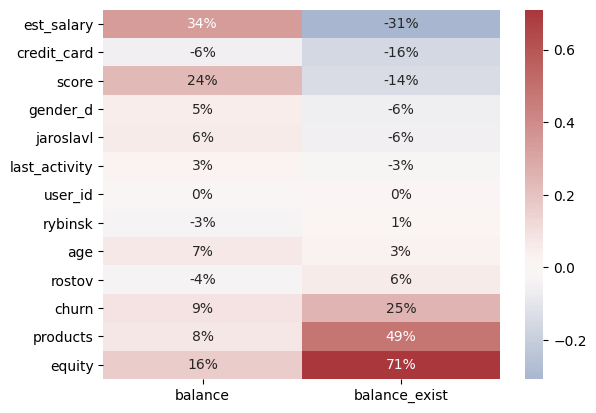

In [9]:
data['balance_exist']=~data['balance'].isna()*1
sns.heatmap(data.corr().loc[:,['balance','balance_exist']].drop(['balance_exist', 'balance']).sort_values('balance_exist'), annot=True, fmt='.0%', cmap='vlag', center=0)

Видно, что баланс коррелирует с equity, score, est_salary. Balance_exist с equity, products, churn, est_salary. Корреляции разнонаправленные и разной силы, но суть в том, что balance - MNAR (Missing Not At Random / Отсутствует не случайно). Значит заполнять его чем-либо не стоит.
В чем причина пропусков - тем не менее не ясно. Можно лишь сказать, что у кого нет собственности нет и баланса, кто использует

##  Промежуточный вывод

__Исходные данные__
Нам предоставлена таблица с данными о клиентах Метанпромбанка, включающие в себя следующие параметры:

    user_id	- уникальный номер клиента
    score - кредитный скоринг клиента полученный из бюро кредитных историй на момент запроса (м.б. не актуален)
    city - город проживания
    gender - пол, кодированный буквами М и Ж
    age	- возраст в годах
    equity - оценка собственности, выполненная косвенным образом
    balance - баланс клиента по всем счетам в банке
    products - количество продуктов, которыми клиент пользуется в банке
    credit_card - пользуется ли клиент кредитной картой
    last_activity - является ли клиент активным
    est_salary - оценочный доход клиента, определенный косвенным образом
    churn - показатель лояльности клиента 1 - планирует уйти, 0 - лоялен.

В таблице 10 000 записей, что соответствует 10 000 клиентов. Скорее всего это не все клиенты банка, т.е. мы имеем дело не с генеральной совокупностью, а с выборкой.

__На этапе предварительной обработки данных:__

Заголовки полей приведены к стандарту

Выявлено 26 пропусков в поле возраст и 2295 пропуска в поле баланс.
    
    Пропуски в поле возраст проигнорированы поскольку их немного и сильно они на результат повлиять не могут.
    Пропуски в поле баланса так же проигнорированы. Поскольку выбросить 20% данных некорректно а заменить их корректно, без искажения статистики невозможно.
    
Явных дубликатов не выявлено.

Обнаружено 73 неявных дубликата в поле user_id связанные с тем, что в городах Ярославль и Рыбинск некоторым пользователям присваивались одинаковые user_id. Возможно какое-то временное рассогласование баз данных. В связи с этим user_id заменены на индексы.

Проведено кодирование данных пола и города - введены поля gender_d (мужской пол - 1, женский - 0), jaroslavl - (проживает в Ярославле - 1, нет - 0), rybinsk - (проживает в Рыбинске - 1, нет - 0), rostov - (проживает в Ростове - 1, нет - 0).

## Исследовательский анализ данных.

In [10]:
churn_share=data['churn'].sum()/len(data)
churn_num=data['churn'].sum()
pd.options.display.float_format ='{:,.2f}'.format
data.agg({"churn":["mean","sum","count"]}).rename({'mean': 'доля уходящих', 'sum': 'количество уходящих', 'count': 'всего в выборке'}, axis='index')

,churn
доля уходящих,0.18
количество уходящих,"1,819.00"
всего в выборке,"9,999.00"


### Разделение параметров на непрерывные (score, age, balance, est_salary), дискретные (city, gender, equiity, products, credit card, last_activity).

### Для непрерывных - строим сравнительные нормированные гистограммы в разрезе параметра churn и ящики с усами. Определяем интервалы значений, характерные величины (медиана/среднее и т.п.). Определяем диапазоны параметра, характерные для отточных клиентов.

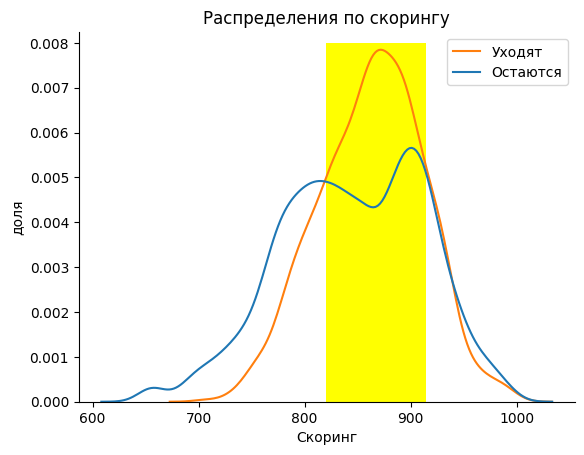

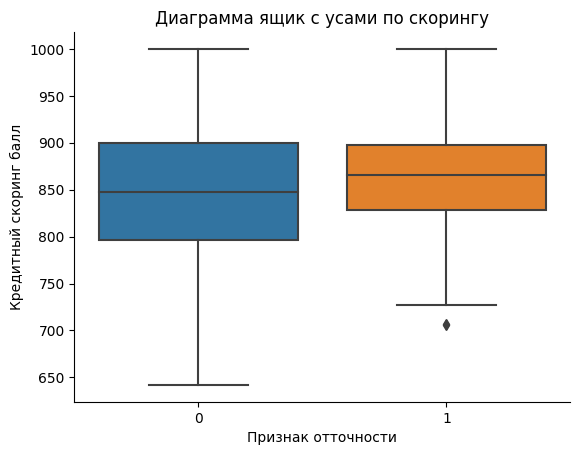

,churn
доля уходящих,0.24
количество уходящих,"1,170.00"
всего в выборке,"4,969.00"


In [11]:
ax = sns.kdeplot(data=data, x='score', hue='churn', common_norm=False)
plt.legend(loc='upper right', labels=['Уходят', 'Остаются'])
ax.set_title('Распределения по скорингу')
rect = patches.Rectangle((820, 0), 95, 0.008, linewidth=1, facecolor='yellow')
ax.add_patch(rect)
ax.set(xlabel='Скоринг', ylabel='доля')
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show(ax)
ax = sns.boxplot(data=data, y='score', x='churn')
ax.set_title('Диаграмма ящик с усами по скорингу')
ax.set(xlabel='Признак отточности', ylabel='Кредитный скоринг балл')
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show(ax)
data.query('score>820 and score<915').agg({"churn":["mean","sum","count"]}).rename({'mean': 'доля уходящих', 'sum': 'количество уходящих', 'count': 'всего в выборке'}, axis='index')

Минимальный скоринг 642, максимальный 1000. Средний и медианный скоринги почти совпадают 853 и 848 соответственно.

Диаграмма "ящик с усами" показывает, что медианный скоринг у лояльных клиентов выше

Из 4969 человек, имеющих скоринг 820-915 баллов, 1170 человек планируют уйти. Это 23%.

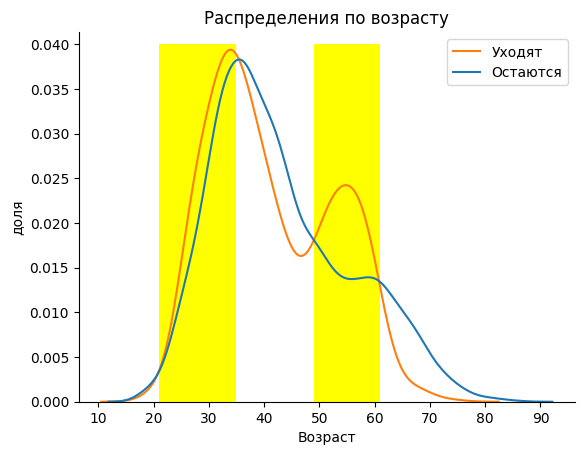

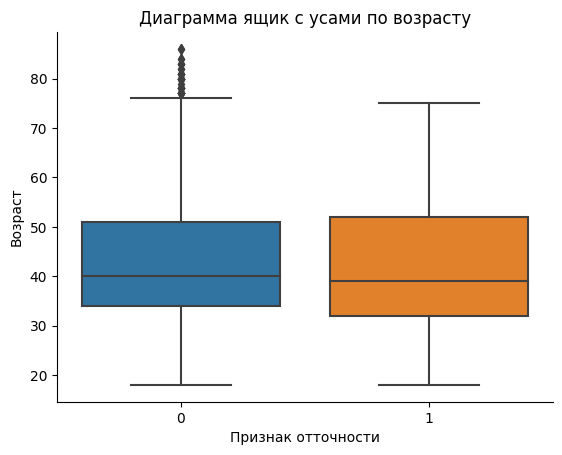

,churn
доля уходящих,0.23
количество уходящих,"1,081.00"
всего в выборке,"4,604.00"


In [12]:
ax = sns.kdeplot(data=data, x='age', hue='churn', common_norm=False)
plt.legend(loc='upper right', labels=['Уходят', 'Остаются'])
ax.set_title('Распределения по возрасту')
rect = patches.Rectangle((21, 0), 14, 0.04, linewidth=1, facecolor='yellow')
ax.add_patch(rect)
rect = patches.Rectangle((49, 0), 12, 0.04, linewidth=1, facecolor='yellow')
ax.add_patch(rect)
ax.set(xlabel='Возраст', ylabel='доля')
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show(ax)
ax = sns.boxplot(data=data, y='age', x='churn')
ax.set_title('Диаграмма ящик с усами по возрасту')
ax.set(xlabel='Признак отточности', ylabel='Возраст')
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show(ax)
display(data.query('21<age<35 or 49<age<61').agg({"churn":["mean","sum","count"]}).rename({'mean': 'доля уходящих', 'sum': 'количество уходящих', 'count': 'всего в выборке'}, axis='index'))

Минимальный возраст 18, максимальный 86, медианный и средний мало отличаются - 40 и 43 соответственно.

Диаграмма "ящик с усами" показывает наличие выбросов среди нелояльных клиентов (имхо сложно назвать возраст выбросом, но как есть). Медианный возраст по ящикам выше у нелояльных клиентов.

Из 4604 человек, в возрасте 21-35 или 49-61, 1081 человек планируют уйти. Это 23 %.

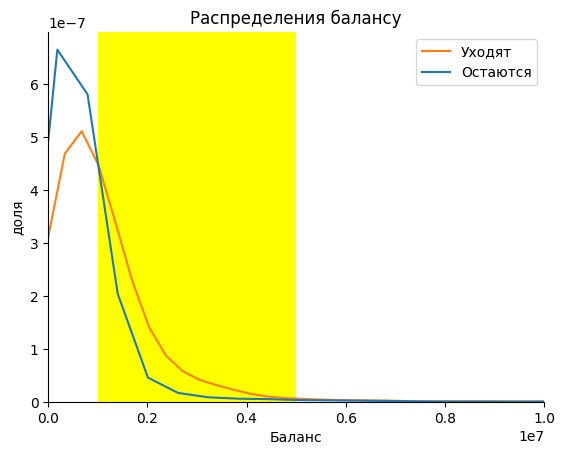

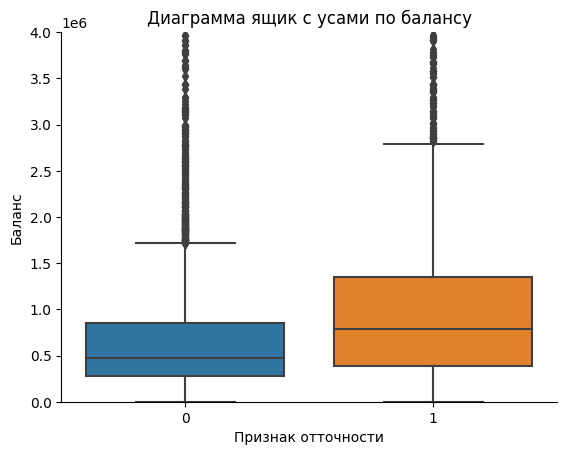

,churn
доля уходящих,0.38
количество уходящих,722.00
всего в выборке,"1,876.00"


In [13]:
ax = sns.kdeplot(data=data, x='balance', hue='churn', common_norm=False)
plt.legend(loc='upper right', labels=['Уходят', 'Остаются'])
ax.set_title('Распределения балансу')
rect = patches.Rectangle((1000000, 0), 4000000, 0.0000007, linewidth=1, facecolor='yellow')
ax.add_patch(rect)
ax.set(xlabel='Баланс', ylabel='доля')
ax.set_xlim(0, 10000000)
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show(ax)
ax = sns.boxplot(data=data, y='balance', x='churn')
ax.set_title('Диаграмма ящик с усами по балансу')
ax.set_ylim([0, 4000000])
ax.set(xlabel='Признак отточности', ylabel='Баланс')
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show(ax)
data.query('1000000<balance').agg({"churn":["mean","sum","count"]}).rename({'mean': 'доля уходящих', 'sum': 'количество уходящих', 'count': 'всего в выборке'}, axis='index')

###### Минимальный баланс 0, максимальный 100 млн., медианный и средний сильно отличаются - 500 тыр и 800 тыр соответственно.

Диаграмма "ящик с усами" так же показывает наличие значительного количества выбросов.

Из 1876 человек, имеющих на балансе от 1 млн у.е., 722 человек планируют уйти. Это 38 %.

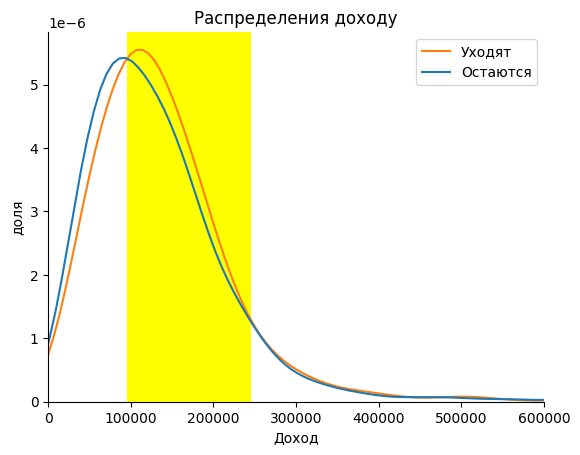

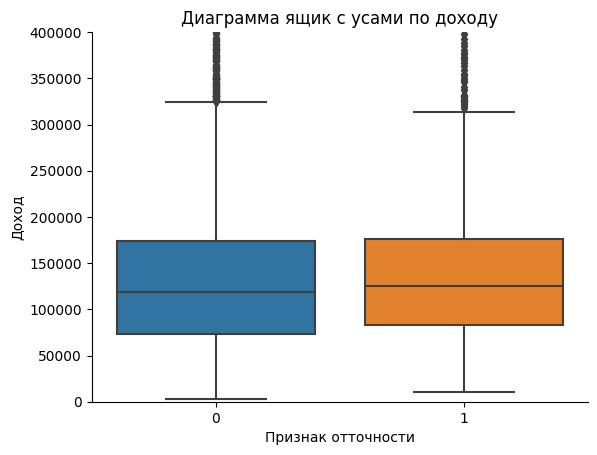

''

'Количество и доля уходящих с доходом в диапазоне 95 - 245 тыс. руб.'

,churn
доля уходящих,0.20
количество уходящих,"1,074.00"
всего в выборке,"5,393.00"


In [14]:
ax = sns.kdeplot(data=data, x='est_salary', hue='churn', common_norm=False)
plt.legend(loc='upper right', labels=['Уходят', 'Остаются'])
ax.set_title('Распределения доходу')
rect = patches.Rectangle((95000, 0), 150000, 0.00005, linewidth=1, facecolor='yellow')
ax.add_patch(rect)
ax.set(xlabel='Доход', ylabel='доля')
ax.set_xlim(0, 600000)
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show(ax)
ax = sns.boxplot(data=data, y='est_salary', x='churn')
ax.set_title('Диаграмма ящик с усами по доходу')
ax.set(xlabel='Признак отточности', ylabel='Доход')
ax.set_ylim([0, 400000])
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show(ax)
display('')
display('Количество и доля уходящих с доходом в диапазоне 95 - 245 тыс. руб.')
data.query('95000<est_salary<245000').agg({"churn":["mean","sum","count"]}).rename({'mean': 'доля уходящих', 'sum': 'количество уходящих', 'count': 'всего в выборке'}, axis='index')

Предполагаемый доход варьируется от 2 500 до 1.4 млн, медианный и средний сильно отличаются ~100 тыр против ~150 тыр. Минимальный доход мал, но поскольку это оценочное значение пока игнорируем этот факт.

Диаграмма "ящик с усами" показывает, что в выборке значительное количество выбросов. Медианные значения немного отличаются.

Из 5393 человек, имеющих доход от 95 до 245 тыс. руб., 1074 человек планируют уйти. Это 20 %, чуть больше среднего.

### Для категориальных параметров определяем для каждого значения величину группы и долю клиентов с churn==1. Таблица + столбчатый график.

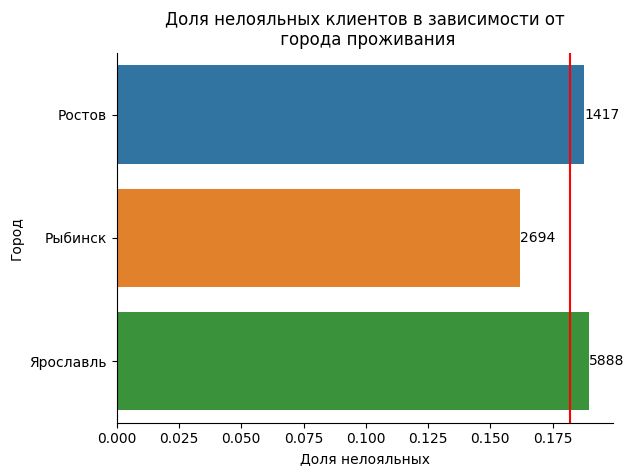

,доля уходящих,количество уходящих,всего в выборке
city,,,
Ростов,0.19,266,1417
Рыбинск,0.16,436,2694
Ярославль,0.19,1117,5888


In [15]:
gender_tab=data.groupby('city').agg({"churn":["mean","sum","count"]})
gender_tab.columns=['доля уходящих', 'количество уходящих', 'всего в выборке']
ax=sns.barplot(data=gender_tab, y=gender_tab.index, x='доля уходящих', orient = 'h')
ax.bar_label(ax.containers[0], labels=gender_tab['всего в выборке'])
ax.set (xlabel='Доля нелояльных', ylabel='Город', 
        title='Доля нелояльных клиентов в зависимости от\n города проживания')
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.axvline(x=churn_share, color='r')
plt.show(ax)
gender_tab

В Ростове и Ярославле относительный отток выше среднего, в Рыбинске - ниже среднего. Но не сильно. Визуально плохой критерий. Но нужно учитывать, что в Ярославле 5888 клиентов в отличие от Ростова (1417) и Рыбинска (2695) и больше половины всех оттекающих живут в Ярославле.

,доля уходящих,количество уходящих,всего в выборке
gender,,,
Ж,0.13,636,4994
М,0.24,1183,5005


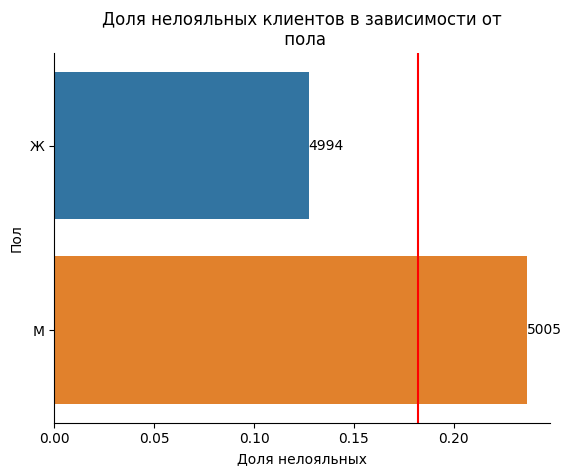

In [16]:
gender_tab=data.groupby('gender').agg({"churn":["mean","sum","count"]})
gender_tab.columns=['доля уходящих', 'количество уходящих', 'всего в выборке']
ax=sns.barplot(data=gender_tab, y=gender_tab.index, x='доля уходящих', orient = 'h')
ax.bar_label(ax.containers[0], labels=gender_tab['всего в выборке'])
ax.set (xlabel='Доля нелояльных', ylabel='Пол', 
        title='Доля нелояльных клиентов в зависимости от\n пола')
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.axvline(x=churn_share, color='r')
gender_tab

В данных количество мужчин и женщин практически одинаковое, при этом отток мужчин выше среднего, женщин - ниже среднего. Почти 2/3 уходящих - мужчины.

,доля уходящих,количество уходящих,всего в выборке
equity,,,
0,0.03,90,2592
1,0.12,93,774
2,0.16,166,1052
3,0.21,321,1542
4,0.25,464,1850
5,0.30,577,1918
6,0.36,58,161
7,0.46,37,80
8,0.35,6,17


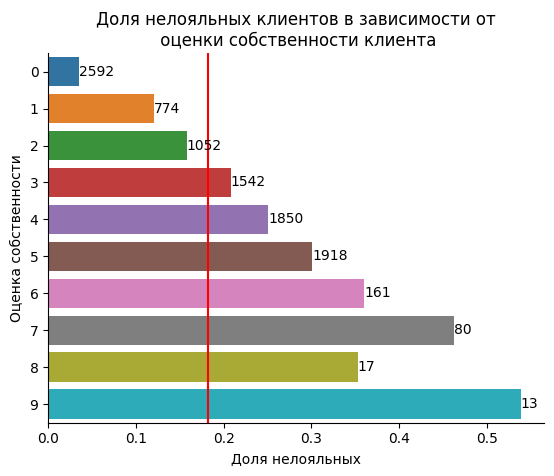

In [17]:
equity_tab=data.groupby('equity').agg({"churn":["mean","sum","count"]})
equity_tab.columns=['доля уходящих', 'количество уходящих', 'всего в выборке']
ax=sns.barplot(data=equity_tab, y=equity_tab.index, x='доля уходящих', orient = 'h')
ax.bar_label(ax.containers[0], labels=equity_tab['всего в выборке'])
ax.set (xlabel='Доля нелояльных', ylabel='Оценка собственности', 
        title='Доля нелояльных клиентов в зависимости от\n оценки собственности клиента')
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.axvline(x=churn_share, color='r')
equity_tab

Клиенты начиная от оценки собственности 3 начинают утекать активнее чем в среднем. В диапазон 3-9 попадает 80% всех планирующих уйти. Очень хороший критерий. Ядро группы 3-5 на случай, если придется сужать захватывает почти 75% оттока. 

,доля уходящих,количество уходящих,всего в выборке
products,,,
1,0.07,235,3341
2,0.19,979,5126
3,0.29,297,1039
4,0.63,300,474
5,0.42,8,19


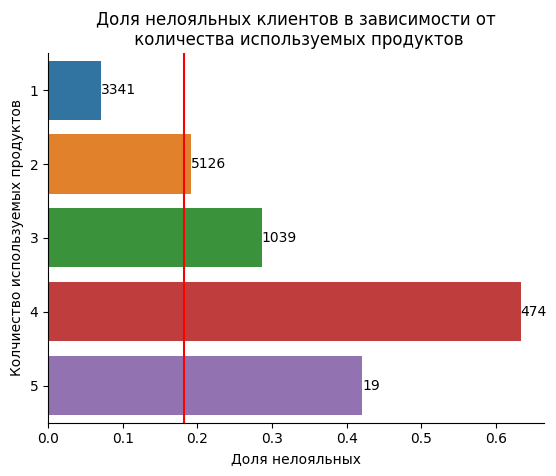

In [18]:
products_tab=data.groupby('products').agg({"churn":["mean","sum","count"]})
products_tab.columns=['доля уходящих', 'количество уходящих', 'всего в выборке']
ax=sns.barplot(data=products_tab, y=products_tab.index, x='доля уходящих', orient = 'h')
ax.bar_label(ax.containers[0], labels=products_tab['всего в выборке'])
ax.set (xlabel='Доля нелояльных', ylabel='Колчиество используемых продуктов', 
        title='Доля нелояльных клиентов в зависимости от\n количества используемых продуктов')
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.axvline(x=churn_share, color='r')
products_tab

Клиенты как бы намекают банку на свое к нему отношение.

Клиенты, имеющие от 2 продуктов и более утекают активнее (87% отточных клиентов в этом диапазоне). Наивысший отток среди имеющих 4 продукта.

Основная часть клиентов (более 80%) пользуется только 2мя продуктами (счет и карта к нему привязанные?)

,доля уходящих,количество уходящих,всего в выборке
нет карты,0.26,816,3195
есть карта,0.15,1003,6804


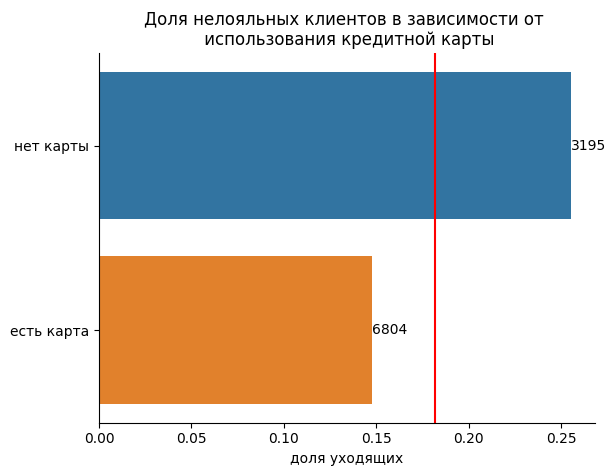

In [19]:
credit_card_tab=data.groupby('credit_card').agg({"churn":["mean","sum","count"]})
credit_card_tab.columns=['доля уходящих', 'количество уходящих', 'всего в выборке']
credit_card_tab.index=['нет карты', 'есть карта']
ax=sns.barplot(data=credit_card_tab, y=credit_card_tab.index, x='доля уходящих', orient = 'h')
ax.bar_label(ax.containers[0], labels=credit_card_tab['всего в выборке'])
ax.set (title='Доля нелояльных клиентов в зависимости от \n использования кредитной карты')
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.axvline(x=churn_share, color='r')
credit_card_tab

Клиенты не имеющие кредитной карты утекают активнее среднего, но их в два раза меньше, чем тех, у кого карта есть. Возможная причина оттока - неудобные условия кредитования по кредитным картам.

,доля уходящих,количество уходящих,всего в выборке
не активный,0.11,541,4764
активный,0.24,1278,5235


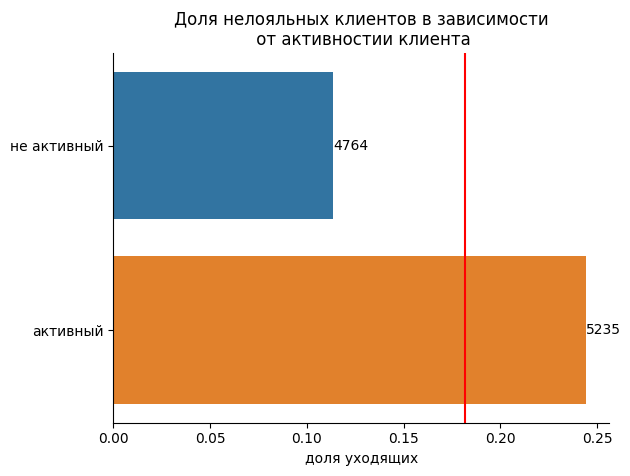

In [20]:
last_activity_tab=data.groupby('last_activity').agg({"churn":["mean","sum","count"]})
last_activity_tab.columns=['доля уходящих', 'количество уходящих', 'всего в выборке']
last_activity_tab.index=['не активный','активный']
ax=sns.barplot(data=last_activity_tab, y=last_activity_tab.index, x='доля уходящих', orient = 'h')
ax.bar_label(ax.containers[0], labels=last_activity_tab['всего в выборке'])
ax.set (title='Доля нелояльных клиентов в зависимости\n от активностии клиента')
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.axvline(x=churn_share, color='r')
last_activity_tab

Самая плохая новость - активнее утекают активные клиенты (звучит логично), которых чуть больше половины в банке.

### Проводим корреляционный анализ данных.

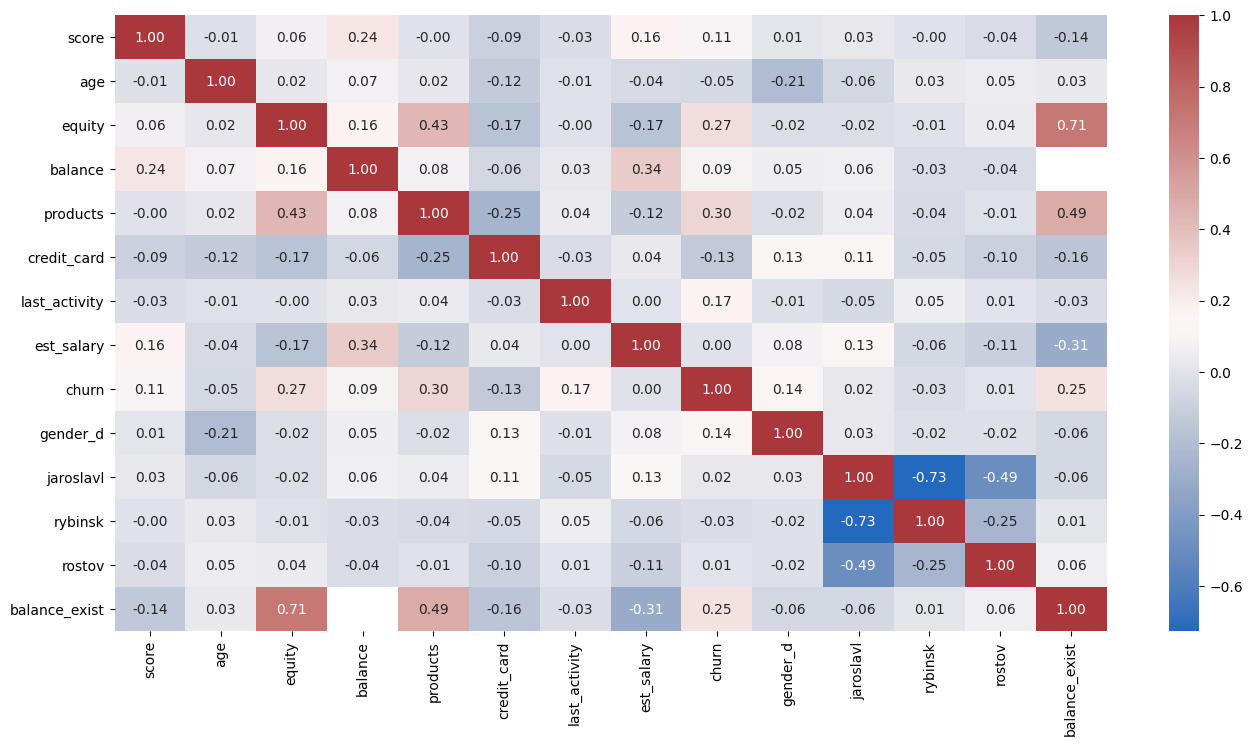

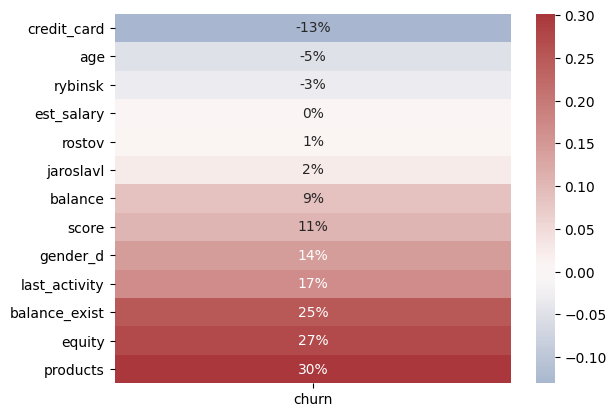

In [21]:
plt.figure(figsize=(16,8))
sns.heatmap(data.drop(['user_id'], axis=1).corr(), annot=True, fmt='.2f', cmap='vlag')
plt.show()
sns.heatmap(data.corr().loc[:,['churn']].drop(['churn','user_id']).sort_values('churn'), annot=True, fmt='.0%', cmap='vlag', center=0)
plt.show()

На общей таблице выделяются 
equity и balance_exist - сильная корреляция 0.7, грубо значит лишь то, что баланс известен - есть собственность, баланс неизвестен - собственности нет.
products - balance exist - средняя корреляция 0.5, грубо если известен баланс - есть продукты.
equity - products - слабая корреляция 0.4, чем больше собственности тем больше продуктов (скажем страховки используют)
balance - est_salary - слабая корреляция 03, больше доход - больше баланс. Логично.
jaroslavl-rybinsk - высокая отрицательная корреляция -0.7, которая значит лишь то, что клиент из ярославля не живет в рыбинске и наоборот. То же касается rostov-jaroslavl и jaroslavl-rybinsk.

В разерезе оттока chorn.
Слабая положительная 0.3 с products - чем больше продуктов тем активнее отток.
Совсем рядом собственность - очень слабая положительная связь 0.27. Больше собственности - активнее отоок.
Очень слабая отрицательная связь -0.13 с наличием кредитной карты - некоторых ее наличие удерживает от ухода из банка.

### Портрет клиента.

In [22]:
# Нам он еще три раза понадобится, поэтому бахнем функцию.
def portrait_maker(df):
    #Собираем таблицу с характеристиками отточных клиентов
    portrait_stay=df[df['churn']==0].agg({
         'gender':['mode'],
         'city':['mode'],
         'age':['median', 'mean'],
         'last_activity':['median'],
         'products':['median'],
         'credit_card':['median'],
         'equity':['median'],
         'balance':['median', 'mean'],
         'score':['median', 'mean'],
         'est_salary':['median', 'mean']
         })
    if len(portrait_stay)==4:
        portrait_stay=portrait_stay.drop(1)
        portrait_stay.iloc[0,0]='МЖ'
    portrait_stay.columns=['Пол', 'Город', 'Возраст', 'Активность', 'Продукты', 'Кредитка', 'Собственность', 'Баланс', 'Скоринг', 'Доход']
    portrait_stay=portrait_stay.fillna('').T
    portrait_stay.columns=pd.MultiIndex.from_tuples( [('Лояльные',''),("Лояльные",'Среднее'),("Лояльные",'Медиана')])

    #Собираем таблицу с характеристиками отточных клиентов
    portrait_leave=df[df['churn']==1].agg({
         'gender':['mode'],
         'city':['mode'],
         'age':['median', 'mean'],
         'last_activity':['median'],
         'products':['median'],
         'credit_card':['median'],
         'equity':['median'],
         'balance':['median', 'mean'],
         'score':['median', 'mean'],
         'est_salary':['median', 'mean']
         })
    portrait_leave.columns=['Пол', 'Город', 'Возраст', 'Активность', 'Продукты', 'Кредитка', 'Собственность', 'Баланс', 'Скоринг', 'Доход']
    portrait_leave=portrait_leave.fillna('').T
    portrait_leave.columns=pd.MultiIndex.from_tuples( [('Отточные',''),("Отточные",'Среднее'),("Отточные",'Медиана')])

    #Объединяем, украшаем
    merged_portrait = pd.merge(portrait_stay, portrait_leave, left_index=True, right_index=True)
    #merged_portrait.columns=pd.MultiIndex.from_tuples( [('Лояльные',''),("Лояльные",'Среднее'),("Лояльные",'Медиана'),('Отточные',''),("Отточные",'Среднее'),("Отточные",'Медиана')])
    pd.options.display.float_format ='{:,.0f}'.format
    display(merged_portrait)
    pd.options.display.float_format ='{:,.2f}'.format
    return portrait_leave

In [23]:
portrait_maker(data);

Лояльные                   Отточные                  
                         Среднее Медиана              Среднее Медиана
Пол                    Ж                          М                  
Город          Ярославль                  Ярославль                  
Возраст                       43      40                   41      39
Активность                             0                            1
Продукты                               2                            2
Кредитка                               1                            1
Собственность                          3                            4
Баланс                   733,983 475,382            1,133,993 782,410
Скоринг                      845     848                  863     866
Доход                    147,783 118,258              148,311 125,395

##  Промежуточные выводы по разделу 

Основной момент - 18% клиентов в выборке не лояльны.

В таблице ниже приведены основные характеристики параметров, связанных с оттоком клиентов.

<table>
  <tr>
    <td><b>Параметр</b></td>
    <td><b>Варьируется от и до</b></td>  
    <td><b>Диапазон где сравнительно<br> много отточных клиентов</b></td>
    <td><b>Количество клиентов<br> в диапазоне</b></td>
    <td><b>Количество отточных<br> в диапазоне</b></td>
    <td><b>Доля</b></td>
  </tr>
  <tr>
    <td>Кредитный скоринг</td>
    <td>642-1000</td>
    <td>820-915</td>
    <td>4969</td>
    <td>1170</td>
    <td>23%</td>
  </tr>
  <tr>
    <td>Город</td>
    <td>Ярославль, Рыбинск, Ростов</td>
    <td>Ярославль</td>
    <td>5888</td>
    <td>1117</td>
    <td>19%</td>
  </tr>  
  <tr>
    <td>Пол</td>
    <td>Мужской, Женский</td>
    <td>Мужской</td>
    <td>5005</td>
    <td>1183</td>
    <td>24%</td>
  </tr>     
  <tr>
    <td>Возраст</td>
    <td>18-86</td>
    <td>21-35 или 49-61</td>
    <td>4604</td>
    <td>1081</td>
    <td>23%</td>
  </tr>       
  <tr>
    <td>Оценка собственности</td>
    <td>0-9</td>
    <td>3-9</td>
    <td>5582</td>
    <td>1471</td>
    <td>26%</td>
  </tr>  			
  <tr>
    <td>Баланс</td>
    <td>0-100 млн.</td>
    <td>более 1 млн.</td>
    <td>1876</td>
    <td>722</td>
    <td>38%</td>
  </tr>   
  <tr>
    <td>Кол-во продуктов</td>
    <td>1-5</td>
    <td>3-5</td>
    <td>1532</td>
    <td>605</td>
    <td>39%</td>
  </tr>       
  <tr>
    <td>Использование кредитной карты</td>
    <td>0 - 1</td>
    <td>0</td>
    <td>3196</td>
    <td>817</td>
    <td>26%</td>
  </tr> 
  <tr>
    <td>Активность</td>
    <td>0 - 1</td>
    <td>1</td>
    <td>5235</td>
    <td>1278</td>
    <td>24%</td>
  </tr>     
  <tr>
    <td>Оценочный доход</td>
    <td>2500-1.4 млн.</td>
    <td>95 до 245 тыс.</td>
    <td>5393</td>
    <td>1074</td>
    <td>20%</td>
  </tr>  
  <tr>
    <td>Планируют уйти</td>
    <td>0 - 1</td>
    <td>1</td>
    <td>1819</td>
    <td>1819</td>
    <td>100%</td>
  </tr> 
</table>

__Анализ корреляций__ параметров позволил установить:

Оценка собственности и наличие данных о балансе - сильная корреляция 0.7, грубо значит лишь то, что баланс известен - есть собственность, баланс неизвестен - собственности нет. 

Количество продуктов и наличие данных о балансе - средняя корреляция 0.5, грубо если известен баланс - есть продукты. 

Оценка собственности - количество продуктов - слабая корреляция 0.4, чем больше собственности тем больше продуктов

Баланс - оценка собственности - слабая корреляция 03, больше доход - больше баланс. Логично. 

__В разерезе оттока__

Слабая положительная 0.3 с количеством продуктов - чем больше продуктов тем активнее отток. 

Совсем рядом собственность - очень слабая положительная связь 0.27. 

Больше собственности - активнее отоок. 

Очень слабая отрицательная связь -0.13 с наличием кредитной карты - некоторых ее наличие удерживает от ухода из банка.

__Портреты клиентов__
<table>
  <tr>
    <td><b>Параметр</b></td>
    <td><b>Лояльные</b></td>
    <td><b>Отточные</b></td>
  </tr>
  <tr>
    <td>Пол</td>
    <td>Жен</td>
    <td>Муж</td>
  </tr>
  <tr>
    <td>Город</td>
    <td>Ярославль</td>
    <td>Ярославль</td>
  </tr>
  <tr>
    <td>Возраст</td>
    <td>40</td>
    <td>39</td>
  </tr>
  <tr>
    <td>Активность</td>
    <td>0</td>
    <td>1</td>
  </tr>    
  <tr>
    <td>Количество продуктов</td>
    <td>2</td>
    <td>2</td>
  </tr>       
  <tr>
    <td>Наличие кредитной карты</td>
    <td>1</td>
    <td>1</td>
  </tr> 
  <tr>
    <td>Оценка собственности</td>
    <td>3</td>
    <td>4</td>
  </tr>  
  <tr>
    <td>Баланс</td>
    <td>475 тыс.</td>
    <td>782 тыс.</td>
  </tr>     
  <tr>
    <td>Кредитный скоринг</td>
    <td>848</td>
    <td>866</td>
  </tr>      
  <tr>
    <td>Оценка дохода</td>
    <td>118 тыс.</td>
    <td>125 тыс.</td>
  </tr>    

## Проверка статистических гипотез.

Проверим гипотезы ttest, но для этого необходимо сначала проверить его применимость. Ттест корректен в случае, если:

    Генеральные совокупности не зависят друг от друга. - наша выборка предположительно дает единомоментный срез, поэтому в группах лояльных и нелояльных клиентов разные люди. Критерий выполнен.
    Выборочные средние нормально распределены. - любая из подвыборок содержит более 30 записей (8180 и 1820), центральная предельная теорема утверждает, что выборочные средние нормально распределены при достаточно больших выбрках. Предположим, что она работает.
    В зависимости от равенства, или различия дисперсий исследуемых генеральных совокупностей мы должны определить параметр equal_var функции st.ttest. В данном случае размеры выборок сильно отличаются, поэтому присвоим параметру значение equal_var = False
    
Поскольку в выборках по многим параметрам присутствуют выбросы, кроме Т-теста будем смотреть и на результаты теста Манна-Уитни.

In [24]:
def combine_test(dt1,dt2):
    alpha = 0.05
    display('Т-тест')
    results = st.ttest_ind(dt1,dt2, equal_var = False)
    print (results.pvalue) 
    if results.pvalue < alpha:
        print ('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print ('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

    display('Тест Манна-Уитни')
    results = st.mannwhitneyu(data[data['churn']==0]['est_salary'],data[data['churn']==1]['est_salary'])
    print('p-значение: ', results.pvalue)
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

### Гипотеза о различии дохода между клиентами, которые планируют уйти и клиентами, которые планируют остаться.

Сформулируем нулевую и альтернативную гипотезы:
H₀: средние оценочных доходов лояльных и отточных клиентов равны
H₁: средние оценочные доходов лояльных и отточных клиентов не равны

In [25]:
combine_test(data[data['churn']==0]['est_salary'],data[data['churn']==1]['est_salary'])

'Т-тест'

0.8724727072323815
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


'Тест Манна-Уитни'

p-значение:  0.00021160652203623057
Отвергаем нулевую гипотезу: разница статистически значима


При стат. значимости 5% отвергнуть гулевую гипотезу не получилось по Т-тесту. Но из анализа данных мы помним, что в оценочных доходах много выбросов, поэтому ориентируемся на результат теста Манна-Уитни как устойчивого к выбросам. Принимаем, что разница статистически значима.

### Гипотеза о различии кредитного скоринга между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.

Сформулируем нулевую и альтернативную гипотезы:

H₀: средние кредитных скорингов лояльных и отточных клиентов равны
H₁: средние кредитных скорингов лояльных и отточных клиентов не равны

In [26]:
combine_test(data[data['churn']==0]['score'],data[data['churn']==1]['score'])

'Т-тест'

1.8436753008142297e-37
Отвергаем нулевую гипотезу: разница статистически значима


'Тест Манна-Уитни'

p-значение:  0.00021160652203623057
Отвергаем нулевую гипотезу: разница статистически значима


И ттест и тест Манна-Уитни показали статистическую значимость разницы кредитного скоринга

### Гипотеза о различии баланса между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.


Сформулируем нулевую и альтернативную гипотезы:

H₀: средние балансов лояльных и отточных клиентов равны
H₁: средние балансов лояльных и отточных клиентов не равны

In [27]:
combine_test(data[(data['churn']==0)&(~data['balance'].isna())]['balance'],
                       data[(data['churn']==1)&(~data['balance'].isna())]['balance'])

'Т-тест'

2.0439782929669117e-13
Отвергаем нулевую гипотезу: разница статистически значима


'Тест Манна-Уитни'

p-значение:  0.00021160652203623057
Отвергаем нулевую гипотезу: разница статистически значима


И Ттест и тест Манна-Уитни показали статистическую значимость разницы балансов лояльных и нелояльных клиентов.

### Гипотеза о различии использования кредитной карты между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.

Сформулируем нулевую и альтернативную гипотезы:

H₀: распространенность кредитных карт среди лояльных и отточных клиентов равны
H₁: распространенность кредитных карт среди лояльных и отточных клиентов отличается

В этом случае тестировать будем Ztest как доли. Основное предположение состоит в том, что выборочные доли нормально распределены относительно истинной доли. Вновь ссылаясь на центральную предельную теорему и значительное количество данных имеющихся в нашем распоряжении, посчитаем это возможным.

Добавим функцию для Ztest долей.

In [28]:
# Функция сравнения пропорций в двух группах
def kind_of_z_test(g1s, g1tr, g2s, g2tr):
    alpha=0.05
    # пропорция успехов в первой группе:
    p1 = g1s/ g1tr
    # пропорция успехов во второй группе:
    p2 = g2s/ g2tr
    # пропорция успехов в комбинированном датасете:
    p_combined = (g1s+g2s) / (g1tr + g2tr)
    # разница пропорций в датасетах
    difference = p1 - p2 
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/g1tr + 1/g2tr))
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    display('Пропорциональный Z-test')
    print('p-значение: ', p_value)
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

In [29]:
kind_of_z_test(data[(data['churn']==0)&(data['credit_card']==1)]['user_id'].count(),#лояльные с картой
               data[(data['churn']==0)]['user_id'].count(),                         #все лояльные
               data[(data['churn']==1)&(data['credit_card']==1)]['user_id'].count(),#нелояльные с картой
               data[(data['churn']==1)]['user_id'].count())                         #все нелояльные

'Пропорциональный Z-test'

p-значение:  0.0
Отвергаем нулевую гипотезу: разница статистически значима


Z-test показал статистическую значимость разницы использования кредитной карты лояльными и нелояльными клиентами.

### Гипотеза о различии собственности между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.

Сформулируем нулевую и альтернативную гипотезы:

H₀: средний показатель собственности лояльных и отточных клиентов равны
H₁: средний показатель собственности лояльных и отточных клиентов отличается

In [30]:
combine_test(data[data['churn']==0]['equity'],data[data['churn']==1]['equity'])

'Т-тест'

1.3413230777986217e-197
Отвергаем нулевую гипотезу: разница статистически значима


'Тест Манна-Уитни'

p-значение:  0.00021160652203623057
Отвергаем нулевую гипотезу: разница статистически значима


И Ттест и тест Манна-Уитни показали статистическую значимость разницы оценки собственности лояльных и нелояльных клиентов.

### Гипотеза о различии активности между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.

Сформулируем нулевую и альтернативную гипотезы:

H₀: активность лояльных и отточных клиентов равныа
H₁: активность лояльных и отточных клиентов не равна

Применять будем Z-test на пропорцию

In [31]:
kind_of_z_test(data[(data['churn']==0)&(data['last_activity']==1)]['user_id'].count(),#лояльные активные
               data[(data['churn']==0)]['user_id'].count(),                         #все лояльные
               data[(data['churn']==1)&(data['last_activity']==1)]['user_id'].count(),#нелояльные активные
               data[(data['churn']==1)]['user_id'].count())                            #все нелояльные

'Пропорциональный Z-test'

p-значение:  0.0
Отвергаем нулевую гипотезу: разница статистически значима


Z-test показал статистическую значимость разницы активности лояльных и нелояльных клиентов.

### Гипотеза о различии проживания в городе Ярославль между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.

Сформулируем нулевую и альтернативную гипотезы:

H₀: проживание в Ярославле среди лояльных и отточных клиентов равны
H₁: проживание в Ярославле среди лояльных и отточных клиентов не равны

In [32]:
kind_of_z_test(data[(data['churn']==0)&(data['jaroslavl']==1)]['user_id'].count(),#лояльные из Ярославля
               data[(data['churn']==0)]['user_id'].count(),                         #все лояльные
               data[(data['churn']==1)&(data['jaroslavl']==1)]['user_id'].count(),#нелояльные из Ярославля
               data[(data['churn']==1)]['user_id'].count()) #все нелояльные

'Пропорциональный Z-test'

p-значение:  0.015674044496274853
Отвергаем нулевую гипотезу: разница статистически значима


Z-test показал статистическую значимость разницы статуса проживания в г. Ярославль для лояльных и нелояльных клиентов.

### Гипотеза о различии пола между клиентами, окторые планируют уйти и клиентами, которые планируют остаться.

Сформулируем нулевую и альтернативную гипотезы:

H₀: пол лояльных и отточных клиентов в среднем одинаков
H₁: пол лояльных и отточных клиентов в среднем отличается

In [33]:
kind_of_z_test(data[(data['churn']==0)&(data['gender_d']==1)]['user_id'].count(),#лояльные мужчины
               data[(data['churn']==0)]['user_id'].count(),                         #все лояльные
               data[(data['churn']==1)&(data['gender_d']==1)]['user_id'].count(),#нелояльные мужчины
               data[(data['churn']==1)]['user_id'].count()) #все нелояльные

'Пропорциональный Z-test'

p-значение:  0.0
Отвергаем нулевую гипотезу: разница статистически значима


Z-test показал статистическую значимость разницы пола лояльных и нелояльных клиентов.

## Промежуточный итог по стат. гипотезам

При статистической значимости 5% методами Т-тест и тест Манна-Уитни и пропорциональным Z-тестом проведены проверки гипотез о статистически значимом различии средних значений параметров в группах лояльных и нелояльных клиентов. Во всех тестах выявлено различие средних значений, т.е. все нижеперечисленные параметры могут быть использованы при дальнейшей сегментации данных.

    Пол
    Проживание в г. Ярославль
    Ативность
    Оценка собственности 
    Наличие кредитной карты банка
    Баланс счетов
    Кредитный скоринг
    Оценка дохода

## Сегментация

### Комбинацией наиболее оточных параметров из пункта 2 попарно (либо тройками) выбрать сегменты, позволяющие выделить отточных клиентов. Требования к сегменту - отоок в 2 раза больше, чем в среднем. Размер сегмента 300-2000 человек. Подобрать сегменты таким образом, чтобы они вместе перекрывали максимально возможное количество отточных клиентов.

Дальше у нас есть два варианта действий. Либо руками разделять клиентов на сегменты комбинируя различные признаки и выискивая наиболее подходящие варианты, либо это как то оптимизировать.
Будем делать три сегмента, в каждом объединим по три признака. В сегменте от 300 до 2000 человек. Чем больше в сегменте отточных клиентов тем он важнее. Далее комбинируем так, чтобы найти комбинацию сегментов с минимальным пересечением групп отточных 

Для начала закодируем признаки

    0 - мужской пол
    1 - живет в Ярославле
    2 - возраст 21-35 лет
    3 - возраст 49-61 год
    4 - активность 1
    5 - продуктов >2
    6 - кредитной карты нет
    7 - собственность >2
    8 - баланс >1 млн.
    9 - кредитный рейтинг 810-915 исключительно
    10 - оценка дохода 950245 тыр исключительно

In [34]:
# кодируем параметры, формируем массив массивов пользователей для каждого параметра. 
group=[data.query('gender_d==1')['user_id'].unique(),
       data.query('jaroslavl==1')['user_id'].unique(),
       data.query('21<age<35')['user_id'].unique(),
       data.query('49<age<61')['user_id'].unique(),
       data.query('last_activity==1')['user_id'].unique(),
       data.query('products>2')['user_id'].unique(),
       data.query('credit_card==0')['user_id'].unique(),
       data.query('equity>2')['user_id'].unique(),
       data.query('balance>1000000')['user_id'].unique(),
       data.query('810<score<915')['user_id'].unique(),
       data.query('95000<est_salary<245000')['user_id'].unique()
      ]
# кодируем параметры, формируем массив массивов отточных пользователей для каждого параметра. 
group_churn=[data.query('gender_d==1 and churn==1')['user_id'].unique(),
       data.query('jaroslavl==1 and churn==1')['user_id'].unique(),
       data.query('(21<age<35) and churn==1')['user_id'].unique(),
       data.query('(49<age<61) and churn==1')['user_id'].unique(),
       data.query('last_activity==1 and churn==1')['user_id'].unique(),
       data.query('products>2 and churn==1')['user_id'].unique(),
       data.query('credit_card==0 and churn==1')['user_id'].unique(),
       data.query('equity>2 and churn==1')['user_id'].unique(),
       data.query('balance>1000000 and churn==1')['user_id'].unique(),
       data.query('810<score<915 and churn==1')['user_id'].unique(),
       data.query('95000<est_salary<245000 and churn==1')['user_id'].unique()
      ]

In [35]:
# формируем сегменты в каждом по три параметра ijk.
triplets = pd.DataFrame({'i': [], 'j': [], 'k': [], 'Отточных':[], 'В сегменте':[], 'Доля':[]})
triplets.drop(triplets.index, inplace=True)
for i in range(0,11):
    for j in range(i+1,11):
        for k in range(j+1,11):
            num_of_churn=len(set(group_churn[i])&set(group_churn[j])&set(group_churn[k]))
            group_size=len(set(group[i])&set(group[j])&set(group[k]))
# соблюдаем условие от 300 до 2000 человек в сегменте, уровень оттока в два раза выше среднего и более.
            if (300<group_size<2000)and(num_of_churn/group_size>=2*churn_share):
                    triplets.loc[len(triplets.index )] = [i, j, k, num_of_churn, group_size, num_of_churn/group_size]
triplets=triplets.astype({'i':'int','j':'int','k':'int','Отточных':'int','В сегменте':'int'})
triplets.sort_values('Отточных', ascending=False).head(5)

,i,j,k,Отточных,В сегменте,Доля
74,4,7,9,797,1814,0.44
23,0,7,9,678,1721,0.39
32,1,4,7,664,1623,0.41
75,4,7,10,653,1480,0.44
11,0,4,7,650,1410,0.46


Сегменты хорошо, но их много - долго комбинировать. Многожды поиграв выяснилось, что важно не получение высокой доли отточных в сегменте как таковой, а получить возможно больше отточных клиентов в сегменте. Забрав топ 15 таких сегментов строим их комбинации. Но перед этим сделаем функцию для комбинирования

In [36]:
# перебираем все комбинации сегментов, сводим в таблицу, сортируем, обрезаем.
def triplets_calc1 (triplets):
    # создаем столбцы
    triplet_groups = pd.DataFrame({'С1Номер': [], 'С1Отток': [], 'С1Всего': [], 'С2Номер': [], 'С2Отток': [], 'С2Всего': [], 'С3Номер': [], 'С3Отток': [], 'С3Всего': [], 'Отточных':[], 'ОтточныхU':[],'В группе':[],'В группеU':[]})
    triplet_groups.columns=pd.MultiIndex.from_tuples( [('Сегмент1','№'),("Сегмент1",'Out'),('Сегмент1','All'),("Сегмент2",'№'),('Сегмент2','Out'),("Сегмент2",'All'),('Сегмент3','№'),("Сегмент3",'Out'),("Сегмент3",'All'), ('Отточных', ''),('ОтточныхU', ''), ('В группе', ''), ('В группеU', '')])
    triplet_groups.drop(triplet_groups.index, inplace=True)
    # шагаем по списку сегментов из входной таблицы тремя индексами
    for i in range(0,len(triplets)):
        for j in range(i+1,len(triplets)):
            for k in range(j+1,len(triplets)):
                # находим количество уникальных общих отточных пользователей, которые попадут в охват
                num_of_churn=len(
                                 set(group_churn[triplets.iloc[i,0]])&set(group_churn[triplets.iloc[i,1]])&set(group_churn[triplets.iloc[i,2]])|
                                 set(group_churn[triplets.iloc[j,0]])&set(group_churn[triplets.iloc[j,1]])&set(group_churn[triplets.iloc[j,2]])|
                                 set(group_churn[triplets.iloc[k,0]])&set(group_churn[triplets.iloc[k,1]])&set(group_churn[triplets.iloc[k,2]])
                                )
                # Эта штука нужна чтобы ускорить и не рассматривать группы сегментов дающие мало уникальных отточных в совокупности
                if (num_of_churn>900):
                # находим количество уникальных общих пользователей, которые попадут в охват
                    group_size=len(
                               set(group[triplets.iloc[i,0]])&set(group[triplets.iloc[i,1]])&set(group[triplets.iloc[i,2]])|
                               set(group[triplets.iloc[j,0]])&set(group[triplets.iloc[j,1]])&set(group[triplets.iloc[j,2]])|
                               set(group[triplets.iloc[k,0]])&set(group[triplets.iloc[k,1]])&set(group[triplets.iloc[k,2]])
                                ) 
                    # формируем таблицу с результатами
                    triplet_groups.loc[len(triplet_groups.index )] = [i, triplets.iloc[i,3], triplets.iloc[i,4],
                                                   j, triplets.iloc[j,3], triplets.iloc[j,4],
                                                   k, triplets.iloc[k,3], triplets.iloc[k,4],
                                                   triplets.iloc[i,3]+triplets.iloc[j,3]+triplets.iloc[k,3],
                                                   num_of_churn,
                                                   triplets.iloc[i,4]+triplets.iloc[j,4]+triplets.iloc[k,4],
                                                   group_size]
    # добавляем общие вещи, форматируем, выдаем.                
    triplet_groups['Доля отточныхU']=triplet_groups['ОтточныхU']/triplet_groups['Отточных']   
    triplet_groups['Доля всехU']=triplet_groups['ОтточныхU']/triplet_groups['В группеU']
    triplet_groups= pd.concat([triplet_groups.iloc[:,:11].astype('int'),triplet_groups.iloc[:,11:]], axis= 1 )
    return triplet_groups

Забираем таблицу топ 15 сегментов по три признака в каждом по колчиеству отточных и получаем список комбинаций сегментов

In [37]:
tr_out_top=triplets.sort_values('Отточных', ascending=False).head(15)
trr=triplets_calc1(tr_out_top)
trr.sort_values('Доля отточныхU', ascending=False).head(3)

Сегмент1            Сегмент2            Сегмент3            Отточных  \
           №  Out   All        №  Out   All        №  Out   All            
365        5  587  1599       13  476  1080       14  473  1085     1536   
363        5  587  1599       12  488   916       13  476  1080     1551   
429        9  547  1336       13  476  1080       14  473  1085     1496   

    ОтточныхU В группе В группеU Доля отточныхU Доля всехU  
                                                            
365      1130 3,764.00  3,122.00           0.74       0.36  
363      1125 3,595.00  2,954.00           0.73       0.38  
429      1058 3,501.00  2,759.00           0.71       0.38

В этой таблице в начале - описания сегментов, входящих в группу, далее 

    Отточных-суммарное количество оттчных в группе, 
    ОтточныхU - общее количество уникальных отточных в группе , 
    В группе - суммарное количество клиентов в группе, 
    В группеU - общее количество уникальных клиентов в группе, 
    Доля отточныхU - доля уникальных отточных от суммарных отточных в группе,
    Доля всехU - доля уникальных отточных от уникальных всех.

Видно, что топовой комбинацией мы закрываем 1130 отточных клиента. Посмотрим, что из себя представляют сегменты топовой группы

In [38]:
tr_out_top.iloc[[5,13,14]]

,i,j,k,Отточных,В сегменте,Доля
2,0,1,7,587,1599,0.37
71,4,6,9,476,1080,0.44
92,7,8,10,473,1085,0.44


In [39]:
data.query('(equity>2)and(balance>1000000)and(95000<est_salary<245000)and(churn==1)')['balance'].sum()

798261661.51

In [40]:
display('Сегмент 1. Сравнительные портреты лояльного и нелояльного клиентов')
portrait_segment1=portrait_maker(data.query('(gender=="М")and(city=="Ярославль")and(equity>2)'));
display('Сегмент 2. Сравнительные портреты лояльного и нелояльного клиентов')
portrait_segment2=portrait_maker(data.query('(credit_card==0)and(last_activity==1)and(810<score<915)'));
display('Сегмент 3. Сравнительные портреты лояльного и нелояльного клиентов')
portrait_segment3=portrait_maker(data.query('(equity>2)and(balance>1000000)and(95000<est_salary<245000)'));

display('Сравнительные портреты нелояльных клиентов трех выбранных сегментов')
merged_portrait = pd.merge(portrait_segment1, portrait_segment2, left_index=True, right_index=True);
merged_portrait = pd.merge(merged_portrait, portrait_segment3, left_index=True, right_index=True);
merged_portrait.columns=pd.MultiIndex.from_tuples( [('Отточные сегмент 1',''),("Отточные сегмент 1",'Среднее'),("Отточные сегмент 1",'Медиана'),('Отточные сегмент 2',''),("Отточные сегмент 2",'Среднее'),("Отточные сегмент 2",'Медиана'),('Отточные сегмент 3',''),("Отточные сегмент 3",'Среднее'),("Отточные сегмент 3",'Медиана')]);
merged_portrait

'Сегмент 1. Сравнительные портреты лояльного и нелояльного клиентов'

Лояльные                     Отточные                    
                           Среднее Медиана              Среднее   Медиана
Пол                    М                            М                    
Город          Ярославль                    Ярославль                    
Возраст                         40      39                   40        37
Активность                               0                              1
Продукты                                 2                              2
Кредитка                                 1                              1
Собственность                            4                              4
Баланс                   1,208,290 617,017            1,566,617 1,003,592
Скоринг                        845     838                  873       875
Доход                      145,534 115,356              171,247   138,427

'Сегмент 2. Сравнительные портреты лояльного и нелояльного клиентов'

Лояльные                   Отточные                  
                         Среднее Медиана              Среднее Медиана
Пол                    Ж                          Ж                  
Город          Ярославль                  Ярославль                  
Возраст                       48      46                   41      38
Активность                             1                            1
Продукты                               2                            2
Кредитка                               0                            0
Собственность                          3                            4
Баланс                   753,441 564,782            1,051,794 847,449
Скоринг                      861     858                  870     871
Доход                    123,657 103,815              138,802 127,462

'Сегмент 3. Сравнительные портреты лояльного и нелояльного клиентов'

Лояльные                       Отточные                    
                           Среднее   Медиана              Среднее   Медиана
Пол                    Ж                              М                    
Город          Ярославль                      Ярославль                    
Возраст                         45        43                   42        40
Активность                                 0                              1
Продукты                                   2                              2
Кредитка                                   1                              0
Собственность                              4                              4
Баланс                   1,757,093 1,315,774            1,687,657 1,475,496
Скоринг                        871       881                  888       894
Доход                      154,639   145,824              162,524   161,113

'Сравнительные портреты нелояльных клиентов трех выбранных сегментов'

Отточные сегмент 1                           Отточные сегмент 2  \
                                      Среднее      Медиана                      
Пол                            М                                            Ж   
Город                  Ярославль                                    Ярославль   
Возраст                                 40.00        37.00                      
Активность                                            1.00                      
Продукты                                              2.00                      
Кредитка                                              1.00                      
Собственность                                         4.00                      
Баланс                           1,566,617.29 1,003,591.92                      
Скоринг                                872.69       875.00                      
Доход                              171,246.66   138,427.18                      

                                      Отточные сегмент 3               \
                   Среднее    Медиана                         Среднее   
Пол                                                    М                
Город                                          Ярославль                
Возраст              40.95      38.00                           42.28   
Активность                       1.00                                   
Продукты                         2.00                                   
Кредитка                         0.00                                   
Собственность                    4.00                                   
Баланс        1,051,794.00 847,449.16                    1,687,656.79   
Скоринг             870.30     871.00                          888.22   
Доход           138,802.07 127,462.38                      162,524.35   

                            
                   Медиана  
Пол                         
Город                       
Возраст              40.00  
Активность            1.00  
Продукты              2.00  
Кредитка              0.00  
Собственность         4.00  
Баланс        1,475,495.83  
Скоринг             894.00  
Доход           161,113.05

### Для сегментов определить возможные причины оттока, предложить преимущества, способные оставить клиента клиентом.

__Сегмент 1__

1599 человек, 587 отточных = 37%.

Объединяющие признаки - Мужчины из города Ярославль с оценкой собственности >2

Отличие нелояльных от лояльных в рамках сегмента - Активность, медианный баланс 1 млн против 600 тыс.

Рекомендации по сохранению

    Активность - упрощение рутинных процедур типа авторизации, оплаты счетов, переводов средств между своими счетами.
    Высокий баланс - предложение выгодных условий по депозитам, офз, 1хbet и прочим средствам сохранения и преумножения капитала.

__Сегмент 2__

1080 человек, 476 отточных = 44%

Объединяющие признаки - Активные, не имеющие кредитной карты клиенты со скоринговым баллом от 810 до 915.

Отличие нелояльных от лояльных в рамках сегмента - возраст 38 против 46, собственность 4 против 3, баланс 847 против 564 тыр, доход 127 против 103 тыр.

Рекомендации по сохранению:

    В этом сегменте собраны Активные люди не имеющие кредитной карты. Значит они имеют таковую в другом банке - предложить лучшие условия.
    Активность - упрощение рутинных процедур типа авторизации, оплаты счетов, переводов средств между своими счетами.
    Собственность - выгодные условия перекредитования/кредитования под залог недвижимого имущества.

__Сегмент 3__

1085 человек, 473 отточных = 44%

Объединяющие признаки - Клиенты с оценкой собственности >2, имеющие на балансе более 1 млн. рублей, с доходом от 95 до 245 тыр.

Отличие нелояльных от лояльных в рамках сегмента - пол М против Ж, Активность, отсутствие кредитной карты, 

Рекомендации по сохранению:

    Активность - упрощение рутинных процедур типа авторизации, оплаты счетов, переводов средств между своими счетами.
    Отсутствие кредитной карты при зп 160 тыр означает, что они имеют таковую в другом банке - предложить лучшие условия.
    В этом сегменте у людей дорогая собственность. Предложить выгодные условия перекредитования/кредитования под залог недвижимого имущества.

__Общие рекомендации по отточным клиентам__:

    Работа с активными клиентами - упрощение рутинных процедур.
    Во всех отточных портретах выше 2 продукта - по идее это счет и дебетовая карта. Нужно развитие направления депозитов, работы с ценными бумагами, кредитованием.
    Все портреты - клиенты с собственностью 4. Им можно предложить операции с кредитованием/перекредитованием под залог недвижимости.
    У многих отсутствуют кредитные карты нашего банка. Необходимо предложить лучшие условия, чем они имеют сейчас.
    Баланс 800 тыр - 1.5 млн. Должны быть востребованы средства вложения и сохранения денег. Снова депозиты и другие модные штуки. 
    
__Приоритет работы с сегментами__

В первую очередь следует работать с __Сегментом 3__. Этот сегмент включает 1085 человек, 44% которых нелояльны. При этом обладают средним балансом в ~1.7 млн. рублей, совокупным балансом 798 млн. рублей и высокой концентрацией отточных.

Во вторую очередь - с __Сегментом 2__. Этот сегмент включает 1080 человек из которых 44% нелояльны. Преимущества этой группы перед первой - высокая концентрация нелояльных и меньший размер группы.

## Формулируем общие выводы

Получены данные о 10 000 клиентов. 

Выявлено 2295 пропусков в поле баланс. Обязательно необходимо проверить с чем это связано. Пока клиенты не начали спрашивать об этом со своей стороны.

Выявлены 73 дубля в поле user_id. Одинаковые user_id присваивались в Ярославле и Рыбинске. Необходимо проверть что не так. 


__Определено что 18% клиентов планируют покинуть банк это клиенты с суммарным известным балансом 2 млрд. рублей.__

В таблице ниже приведены основные характеристики параметров, связанных с оттоком клиентов.

<table>
  <tr>
    <td><b>Параметр</b></td>
    <td><b>Варьируется от и до</b></td>  
    <td><b>Диапазон где сравнительно<br> много отточных клиентов</b></td>
    <td><b>Количество отточных<br> в диапазоне</b></td>
    <td><b>Количество клиентов<br> в диапазоне</b></td>
    <td><b>Доля</b></td>
  </tr>
  <tr>
    <td>Кредитный скоринг</td>
    <td>642-1000</td>
    <td>820-915</td>
    <td>4969</td>
    <td>1170</td>
    <td>23%</td>
  </tr>
  <tr>
    <td>Город</td>
    <td>Ярославль, Рыбинск, Ростов</td>
    <td>Ярославль</td>
    <td>5888</td>
    <td>1117</td>
    <td>19%</td>
  </tr>  
  <tr>
    <td>Пол</td>
    <td>Мужской, Женский</td>
    <td>Мужской</td>
    <td>5005</td>
    <td>1183</td>
    <td>24%</td>
  </tr>     
  <tr>
    <td>Возраст</td>
    <td>18-86</td>
    <td>21-35 или 49-61</td>
    <td>4604</td>
    <td>1081</td>
    <td>23%</td>
  </tr>       
  <tr>
    <td>Оценка собственности</td>
    <td>0-9</td>
    <td>3-9</td>
    <td>5582</td>
    <td>1471</td>
    <td>26%</td>
  </tr>  			
  <tr>
    <td>Баланс</td>
    <td>0-100 млн.</td>
    <td>более 1 млн.</td>
    <td>1876</td>
    <td>722</td>
    <td>38%</td>
  </tr>   
  <tr>
    <td>Кол-во продуктов</td>
    <td>1-5</td>
    <td>3-5</td>
    <td>1532</td>
    <td>605</td>
    <td>39%</td>
  </tr>       
  <tr>
    <td>Использование кредитной карты</td>
    <td>0 - 1</td>
    <td>0</td>
    <td>3196</td>
    <td>817</td>
    <td>26%</td>
  </tr> 
  <tr>
    <td>Активность</td>
    <td>0 - 1</td>
    <td>1</td>
    <td>5235</td>
    <td>1278</td>
    <td>24%</td>
  </tr>     
  <tr>
    <td>Оценочный доход</td>
    <td>2500-1.4 млн.</td>
    <td>95 до 245 тыс.</td>
    <td>5393</td>
    <td>1074</td>
    <td>20%</td>
  </tr>  
  <tr>
    <td>Планируют уйти</td>
    <td>0 - 1</td>
    <td>1</td>
    <td>1819</td>
    <td>1819</td>
    <td>100%</td>
  </tr> 
</table>

__Портреты клиентов__
<table>
  <tr>
    <td><b>Параметр</b></td>
    <td><b>Лояльные</b></td>
    <td><b>Отточные</b></td>
  </tr>
  <tr>
    <td>Пол</td>
    <td>Жен</td>
    <td>Муж</td>
  </tr>
  <tr>
    <td>Город</td>
    <td>Ярославль</td>
    <td>Ярославль</td>
  </tr>
  <tr>
    <td>Возраст</td>
    <td>40</td>
    <td>39</td>
  </tr>
  <tr>
    <td>Активность</td>
    <td>0</td>
    <td>1</td>
  </tr>    
  <tr>
    <td>Количество продуктов</td>
    <td>2</td>
    <td>2</td>
  </tr>       
  <tr>
    <td>Наличие кредитной карты</td>
    <td>1</td>
    <td>1</td>
  </tr> 
  <tr>
    <td>Оценка собственности</td>
    <td>3</td>
    <td>4</td>
  </tr>  
  <tr>
    <td>Баланс</td>
    <td>475 тыс.</td>
    <td>782 тыс.</td>
  </tr>     
  <tr>
    <td>Кредитный скоринг</td>
    <td>848</td>
    <td>866</td>
  </tr>      
  <tr>
    <td>Оценка дохода</td>
    <td>118 тыс.</td>
    <td>125 тыс.</td>
  </tr>    

При статистической значимости 5% методами Т-тест и тест Манна-Уитни проведены проверки гипотез о статистически значимом различии средних значений параметров в группах лояльных и нелояльных клиентов. Во всех тестах выявлено различие средних значений, т.е. все нижеперечисленные параметры могут быть использованы при дальнейшей сегментации данных.

    Пол
    Проживание в г. Ярославль
    Ативность
    Оценка собственности
    Наличие кредитной карты банка
    Баланс счетов
    Кредитный скоринг
    Оценка дохода

На базе информации выше выделены три сегмента клиентов в совокупности покрывающие 3122 уникальных клиента, 1130 из которых не являются лояльными.


<table>
  <tr>
    <td><b>Параметр</b></td>
    <td><b>Сегмент 1</b></td>
    <td><b>Сегмент 2</b></td>
    <td><b>Сегмент 3</b></td>
  </tr>
  <tr>
    <td>Включает/отточных/доля%</td>
    <td>1599 / 587 / 37%</td>
    <td>1080 / 476 / 44%</td>
    <td>1085 / 473 / 44%</td>
  </tr>
  <tr>
    <td>Общие признаки</td>
    <td>Мужчины, Ярославль,<br> собственность >2</td>
    <td>Активные, без кредитки,<br> скоринг 810 - 915</td>
    <td>Собственность >2, балансе >1 млн.,<br> доход 95-245 тыр</td>
  </tr>
  <tr>
    <td>Отличие от лояльных</td>
    <td>Активность, баланс</td>
    <td>Возраст, собственность</td>
    <td>Пол, активность, отсутствие кредитки</td>
  </tr>
  <tr>
    <td>Созранение</td>
    <td>Упрощение рутины, сохранение</td>
    <td>Упрощенеи рутины, кредитка, ипотека</td>
    <td>Упрощение рутины, кредитка, ипотека</td>
  </tr>
</table> 

__Приоритет работы с сегментами__

В первую очередь следует работать с __Сегментом 3__. Этот сегмент включает 1085 человек, 44% которых нелояльны. При этом обладают медианным балансом в 1.5 млн. рублей и совокупным балансом 798 млн. рублей.

Во вторую очередь - с __Сегментом 2__. Этот сегмент включает 1080 человек из которых 44% нелояльны. Как показывает статистика, кредитная карта - эффективный метод удержания клиентов и в этой группе предложение кредитной карты должно сработать сильнее всего. Плюс эта группа меньше последней.

### Заключение

Выявлен потенциальный отток до 18% клиентов банка, до 2 млрд. рублей по предоставленной выборке.

Из 10 предоставленных характеристик по всем выявлены различия поведения средних клиентов.

Сильнее всего связаны с оттоком такие характеристики, как поличество продуктов в использовании, наличие дорогой обственности, активное пользование банковскими услугами.

Удерживает клиентов от оттока наличие кредитной карты, возраст и проживание в городе Рыбинск.

Нелояльные клиенты были разделены на 3 сегмента по трем общим параметрам каждый. Составлены портреты, предложены рекомендации по работе и очередности обработки сегментов.

## Готовим презентацию.